## Importing Utility Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report as rep
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import confusion_matrix
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Checkpoint 1: Perform data analysis of the dataset

### Loading Dataset

In [2]:
titanic_df = pd.read_csv("titanic.csv")

In [3]:
titanic_df.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


### EDA

In [5]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

#### Titanic Dataset has 887 Entries, 8 Features and it consiste of float, int and object datatype

In [6]:
titanic_df.isnull().sum(axis=0)

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

#### Dataset does not have any missing value

In [7]:
titanic_df.nunique()

Survived                     2
Pclass                       3
Name                       887
Sex                          2
Age                         89
Siblings/Spouses Aboard      7
Parents/Children Aboard      7
Fare                       248
dtype: int64

#### Statistical Inference of  the dataset

In [8]:
titanic_df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


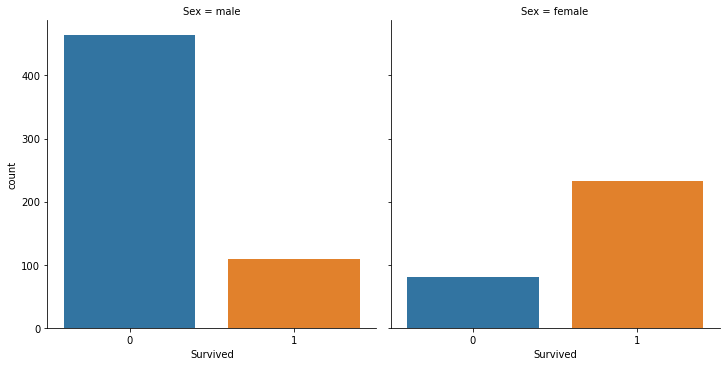

In [9]:
sns.factorplot(x="Survived",col="Sex",kind="count",data=titanic_df);

####  from the above graph we can say that number of female survivers are more than male survivers 

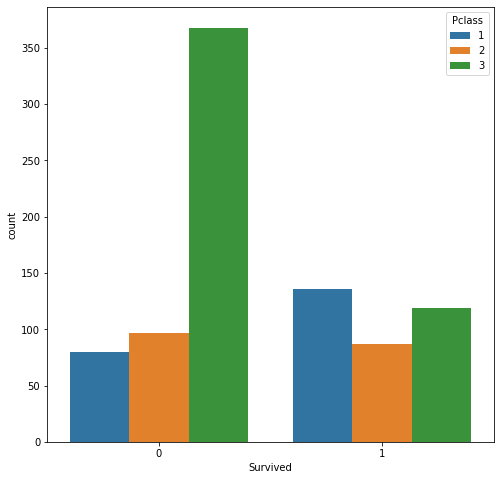

In [10]:
f, ax = plt.subplots(figsize=(8, 8))
sns.countplot(x="Survived",hue="Pclass",data=titanic_df);

#### We can say that people who travelled in class 3 are most likely to survive

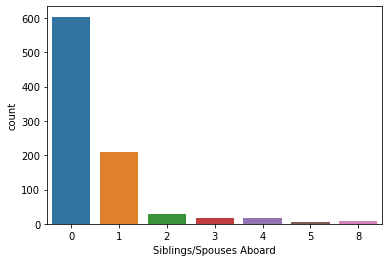

In [11]:
sns.countplot(x="Siblings/Spouses Aboard",data=titanic_df);

#### From the above graph we can infer that most of the passengers travelled alone

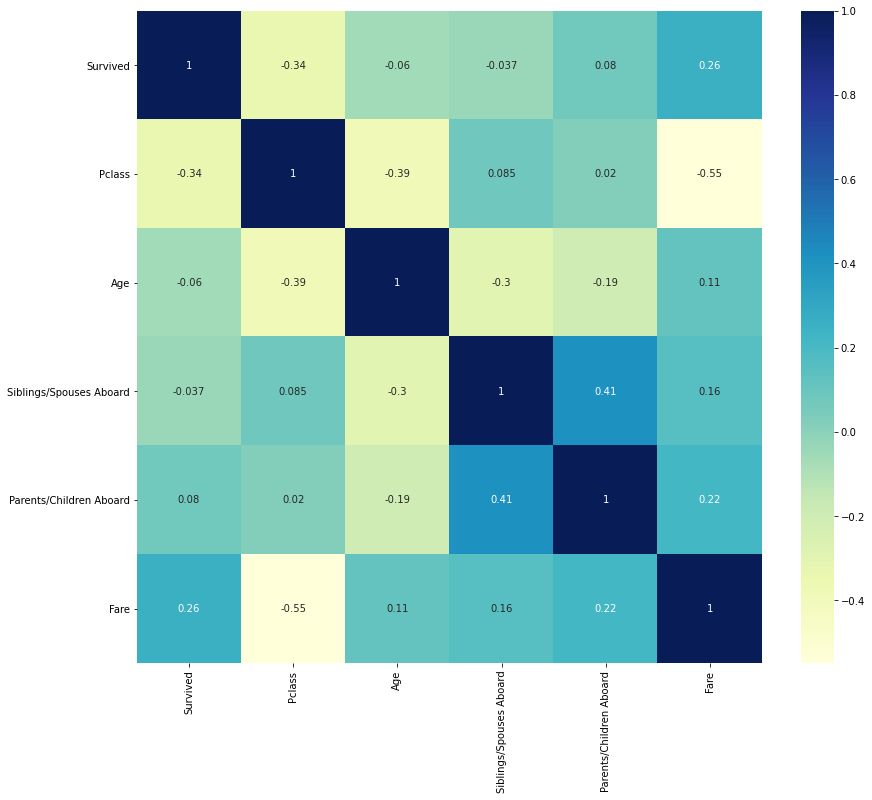

In [12]:
f, ax = plt.subplots(figsize=(14, 12))
correlation = titanic_df.corr()
sns.heatmap(correlation, annot=True, cbar=True, cmap="YlGnBu");
    

### Data Preprocessing

#### Getting Dummy variables for  Sex and Pclass columns since they have categorical values and dropping Name column which is less significant 

In [13]:
sex=pd.get_dummies(titanic_df["Sex"])
pclass=pd.get_dummies(titanic_df["Pclass"])

In [14]:
sex.head(),pclass.head()

(   female  male
 0       0     1
 1       1     0
 2       1     0
 3       1     0
 4       0     1,
    1  2  3
 0  0  0  1
 1  1  0  0
 2  0  0  1
 3  1  0  0
 4  0  0  1)

In [15]:
new_titanic_df = pd.concat([titanic_df, sex, pclass], axis = 1)

In [16]:
new_titanic_df = new_titanic_df.drop(['Sex','Name','Pclass'], axis = 1)
new_titanic_df

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,female,male,1,2,3
0,0,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
882,0,27.0,0,0,13.0000,0,1,0,1,0
883,1,19.0,0,0,30.0000,1,0,1,0,0
884,0,7.0,1,2,23.4500,1,0,0,0,1
885,1,26.0,0,0,30.0000,0,1,1,0,0


## Checkpoint 2 : Applying ML analysis

In [17]:
new_titanic_df

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,female,male,1,2,3
0,0,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
882,0,27.0,0,0,13.0000,0,1,0,1,0
883,1,19.0,0,0,30.0000,1,0,1,0,0
884,0,7.0,1,2,23.4500,1,0,0,0,1
885,1,26.0,0,0,30.0000,0,1,1,0,0


In [18]:
X = new_titanic_df.iloc[:,1:]
y = new_titanic_df['Survived']
X

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,female,male,1,2,3
0,22.0,1,0,7.2500,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,1,0,0
2,26.0,0,0,7.9250,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,1,0,0
4,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
882,27.0,0,0,13.0000,0,1,0,1,0
883,19.0,0,0,30.0000,1,0,1,0,0
884,7.0,1,2,23.4500,1,0,0,0,1
885,26.0,0,0,30.0000,0,1,1,0,0


In [19]:
print(X.shape[0] ,y.shape[0])

887 887


In [20]:
print(X.shape, y.shape)

(887, 9) (887,)


#### Splitting Dataset into train test split to apply machine learning model

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

#### Normalising Dataset using MinMax Scalar

In [22]:
scaler = MinMaxScaler()

y_train

730    0
390    0
118    0
440    1
309    1
      ..
106    1
270    1
860    0
435    0
102    0
Name: Survived, Length: 709, dtype: int64

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled.head()

,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,female,male,1,2,3
0,0.281482,0.00,0.000000,0.025374,0.0,1.0,0.0,1.0,0.0
1,0.344510,0.25,0.000000,0.015469,0.0,1.0,0.0,0.0,1.0
2,0.016765,0.50,0.333333,0.061045,1.0,0.0,0.0,0.0,1.0
3,0.344510,0.00,0.000000,0.025374,1.0,0.0,0.0,1.0,0.0
4,0.218455,0.25,0.333333,0.512122,1.0,0.0,1.0,0.0,0.0


#### (a) Logistic Regression

In [24]:
logreg = LogReg()
# Fitting the model
logreg.fit(X_train,y_train)
y_log = logreg.predict(X_test)
print('The accuracy for the Logistic Regression is', metrics.accuracy_score(y_log,y_test))

The accuracy for the Logistic Regression is 0.7528089887640449


In [25]:
cf= confusion_matrix(y_test, y_log)
print(cf)

[[98 13]
 [31 36]]


In [26]:
print(rep( y_test , y_log ))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       111
           1       0.73      0.54      0.62        67

    accuracy                           0.75       178
   macro avg       0.75      0.71      0.72       178
weighted avg       0.75      0.75      0.74       178



In classification report of the Logistic Regression algorithm we can see that the value of precision is pretty high that means we have achieved more True positive values than False positive values in the prediction

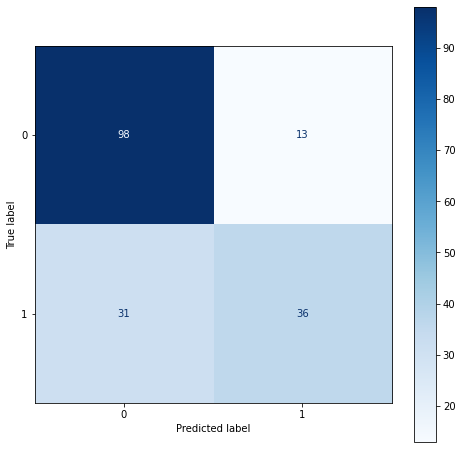

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
KNN_cm = metrics.plot_confusion_matrix(logreg, X_test, y_test,
                                 ax=ax,cmap=plt.cm.Blues)

#### From the graph we can see that there are 31 + 13 = 44 wrong predictions

#### (b) KNN

Here taking range of 15 values to get the best value for the K 

In [28]:

accuracy = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
    print("When k =", i ,"Accuracy Score is", accuracy_score(y_test,y_pred))

When k = 1 Accuracy Score is 0.6741573033707865
When k = 2 Accuracy Score is 0.6629213483146067
When k = 3 Accuracy Score is 0.6910112359550562
When k = 4 Accuracy Score is 0.6910112359550562
When k = 5 Accuracy Score is 0.6853932584269663
When k = 6 Accuracy Score is 0.7078651685393258
When k = 7 Accuracy Score is 0.7359550561797753
When k = 8 Accuracy Score is 0.7191011235955056
When k = 9 Accuracy Score is 0.7471910112359551
When k = 10 Accuracy Score is 0.7247191011235955
When k = 11 Accuracy Score is 0.7134831460674157
When k = 12 Accuracy Score is 0.7191011235955056
When k = 13 Accuracy Score is 0.7134831460674157
When k = 14 Accuracy Score is 0.6910112359550562


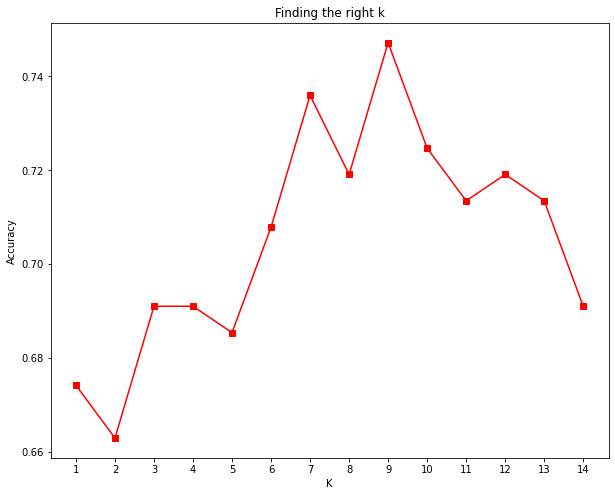

In [29]:
plt.figure(figsize=(10,8))
plt.plot(range(1,15), accuracy, color="red", marker ="s")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Finding the right k")
plt.xticks(range(1,15))
plt.show()

## From the above plot we can infer that best value for the k is 9

In [30]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X,y)
y_pred = knn.predict(X_test)
print("The Accuracy for the KNN is:",metrics.accuracy_score(y_pred, y_test)*100)

The Accuracy for the KNN is: 75.28089887640449


In [31]:
print('The Classification Report for the KNN is :')
print()
print( metrics.classification_report(y_pred,y_test))

The Classification Report for the KNN is :

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       123
           1       0.58      0.71      0.64        55

    accuracy                           0.75       178
   macro avg       0.72      0.74      0.73       178
weighted avg       0.77      0.75      0.76       178



In classification report of the KNN algorithm we can see that the value of precision is pretty high that means we have achieved more True positive values than False positive values in the prediction

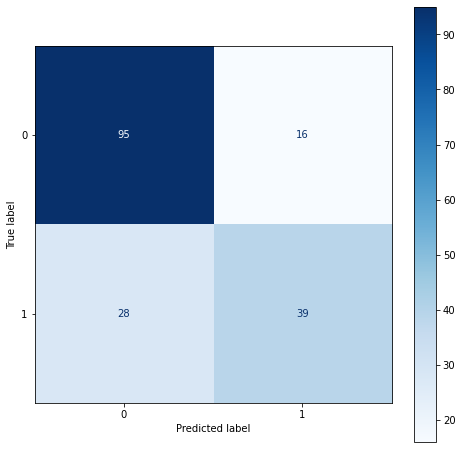

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
KNN_cm = metrics.plot_confusion_matrix(knn, X_test, y_test,
                                 ax=ax,cmap=plt.cm.Blues)

#### From the graph we can see that there are 28 + 16 = 44 wrong predictions

#### (c) SVM

In [33]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)
pred_SVM = SVM.predict(X_test)
print('The accuracy for the SVM is',metrics.accuracy_score(pred_SVM,y_test))

The accuracy for the SVM is 0.651685393258427


In [34]:
print('The Classification Report for the SVM is :')
print()
print( metrics.classification_report(pred_SVM,y_test))

The Classification Report for the SVM is :

              precision    recall  f1-score   support

           0       0.95      0.65      0.77       163
           1       0.15      0.67      0.24        15

    accuracy                           0.65       178
   macro avg       0.55      0.66      0.51       178
weighted avg       0.89      0.65      0.73       178



In classification report of the Support Vector Machine we can see that the value of precision is pretty high that means we have achieved more True positive values than False positive values in the prediction

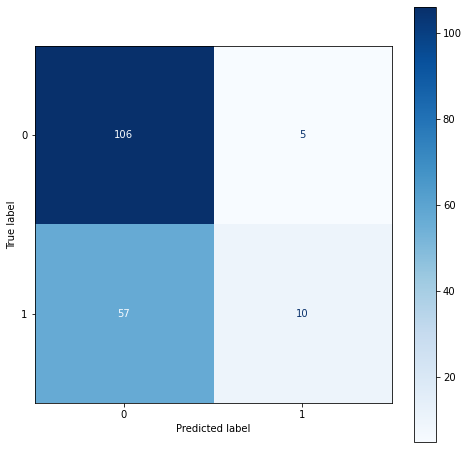

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))
SVM_cm = metrics.plot_confusion_matrix(SVM, X_test, y_test,ax=ax,cmap=plt.cm.Blues)

#### From the graph we can see that there are 57 + 5 = 62 wrong predictions

In [36]:
acc_DF = {'Accuracies':[0.75,0.75,0.65], "Models": ['LogReg','KNN','SVM']}
acc_Dataframe = pd.DataFrame(data = acc_DF)
acc_Dataframe

,Accuracies,Models
0,0.75,LogReg
1,0.75,KNN
2,0.65,SVM


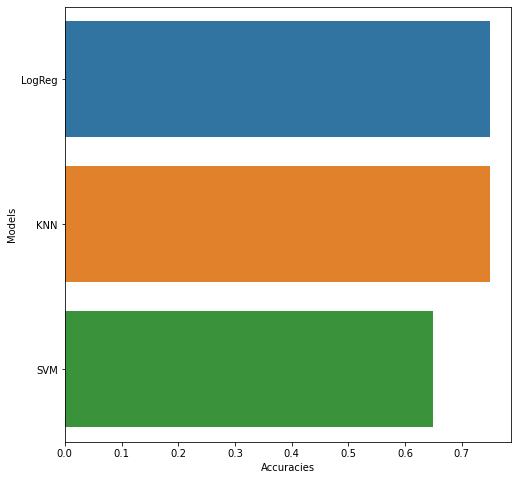

In [37]:
 fig, ax = plt.subplots(figsize=(8, 8))
 sns.barplot(x="Accuracies", y="Models", data=acc_Dataframe,  ax = ax);

## From the above plot we can see that Logistic Regression and K Nearest Nieghbours performs better than Support Vector Machine on Titanic Dataset with 75%  accuracy. 

## Deep Learning

#### 1st Variation of NN

In [38]:

model = Sequential()

# Definig layers
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
model.add(Dense(9, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 50        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 236
Trainable params: 236
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100,
        validation_split=0.1,verbose = 1,shuffle=True)

Epoch 1/100
20/20 [==============================] - 2s 55ms/step - loss: 0.6927 - accuracy: 0.5605 - val_loss: 0.6921 - val_accuracy: 0.5634
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.6362 - val_loss: 0.6909 - val_accuracy: 0.5634
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.6064 - val_loss: 0.6886 - val_accuracy: 0.5634
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.6170 - val_loss: 0.6828 - val_accuracy: 0.5775
Epoch 5/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.6253 - val_loss: 0.6716 - val_accuracy: 0.5915
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.6684 - val_loss: 0.6561 - val_accuracy: 0.6056
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.6593 - val_loss: 0.6505 - val_accuracy: 0.6056
Epoch 8/100


In [40]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


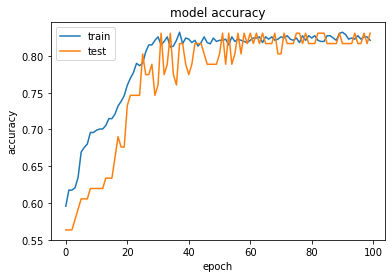

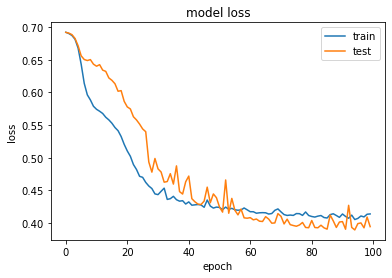

In [41]:
# For accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# For loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [42]:
y_pred = model.predict(X_test)
y_pred

array([[0.3166889 ],
       [0.1543288 ],
       [0.02610546],
       [0.28965533],
       [0.12249538],
       [0.58917654],
       [0.16784588],
       [0.13950759],
       [0.6333775 ],
       [0.5526397 ],
       [0.36353907],
       [0.8951682 ],
       [0.53743243],
       [0.05447406],
       [0.47520316],
       [0.16319704],
       [0.04974532],
       [0.9802433 ],
       [0.16311428],
       [0.15913308],
       [0.08869916],
       [0.29447782],
       [0.6520721 ],
       [0.23615533],
       [0.19534978],
       [0.3404493 ],
       [0.14598936],
       [0.12520668],
       [0.09714136],
       [0.4050781 ],
       [0.5926743 ],
       [0.31102318],
       [0.91793513],
       [0.63793755],
       [0.4041565 ],
       [0.11950004],
       [0.09401786],
       [0.3593129 ],
       [0.9406202 ],
       [0.69551814],
       [0.29611427],
       [0.10133618],
       [0.9438355 ],
       [0.15432978],
       [0.19847867],
       [0.06308669],
       [0.09658223],
       [0.121

In [43]:
#### 2nd Variation of NN

In [44]:
model_2 = Sequential()

# Definig layers
model_2.add(Dense(9, kernel_initializer = 'uniform', activation = 'softmax', input_dim = 9))
model_2.add(Dropout(0.5))
model_2.add(Dense(9, kernel_initializer = 'uniform', activation = 'softmax'))
model_2.add(Dropout(0.5))
model_2.add(Dense(5, kernel_initializer = 'uniform', activation = 'softmax'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model_2.compile(optimizer = 'Adagrad', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Model summary
model_2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 9)                 90        
_________________________________________________________________
dropout (Dropout)            (None, 9)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 90        
_________________________________________________________________
dropout_1 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 50        
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [45]:
history_2 = model_2.fit(X_train, y_train, batch_size = 32, epochs = 200,
        validation_split=0.1, verbose = 2, shuffle=True)

Epoch 1/200
20/20 - 2s - loss: 0.6941 - accuracy: 0.4091 - val_loss: 0.6935 - val_accuracy: 0.4366
Epoch 2/200
20/20 - 0s - loss: 0.6936 - accuracy: 0.4420 - val_loss: 0.6933 - val_accuracy: 0.4366
Epoch 3/200
20/20 - 0s - loss: 0.6932 - accuracy: 0.5094 - val_loss: 0.6931 - val_accuracy: 0.5634
Epoch 4/200
20/20 - 0s - loss: 0.6927 - accuracy: 0.5455 - val_loss: 0.6929 - val_accuracy: 0.5634
Epoch 5/200
20/20 - 0s - loss: 0.6926 - accuracy: 0.5768 - val_loss: 0.6927 - val_accuracy: 0.5634
Epoch 6/200
20/20 - 0s - loss: 0.6922 - accuracy: 0.6050 - val_loss: 0.6926 - val_accuracy: 0.5634
Epoch 7/200
20/20 - 0s - loss: 0.6919 - accuracy: 0.6176 - val_loss: 0.6924 - val_accuracy: 0.5634
Epoch 8/200
20/20 - 0s - loss: 0.6917 - accuracy: 0.6176 - val_loss: 0.6923 - val_accuracy: 0.5634
Epoch 9/200
20/20 - 0s - loss: 0.6914 - accuracy: 0.6176 - val_loss: 0.6922 - val_accuracy: 0.5634
Epoch 10/200
20/20 - 0s - loss: 0.6911 - accuracy: 0.6176 - val_loss: 0.6921 - val_accuracy: 0.5634
Epoch 11/

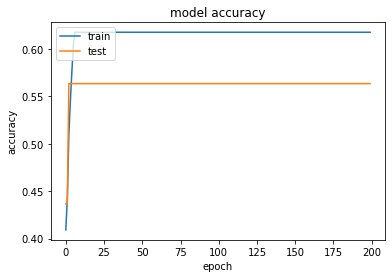

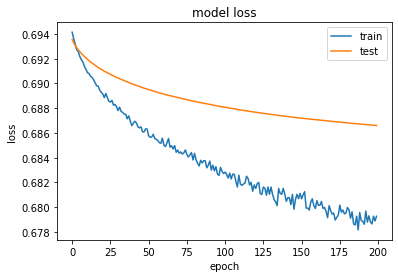

In [46]:
# For accuracy
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# For loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#### 3rd Variation of NN

In [47]:
model_3 = Sequential()

# Definig layers
model_3.add(Dense(22, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
model_3.add(Dropout(0.75))
model_3.add(Dense(11, kernel_initializer = 'uniform', activation = 'relu'))
model_3.add(Dropout(0.75))
model_3.add(Dense(11, kernel_initializer = 'uniform', activation = 'relu'))
model_3.add(Dropout(0.75))
model_3.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model_3.add(Dropout(0.75))
model_3.add(Dense(1, kernel_initializer = 'uniform', activation = 'tanh'))
model_3.compile(optimizer = 'adadelta', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Model summary|
model_3.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 22)                220       
_________________________________________________________________
dropout_3 (Dropout)          (None, 22)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 11)                253       
_________________________________________________________________
dropout_4 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 11)                132       
_________________________________________________________________
dropout_5 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [48]:
history_3 = model_3.fit(X_train, y_train, batch_size = 32, epochs = 400,
        validation_split=0.1, verbose = 2, shuffle=True)

Epoch 1/400
20/20 - 1s - loss: nan - accuracy: 0.6176 - val_loss: nan - val_accuracy: 0.5634
Epoch 2/400
20/20 - 0s - loss: nan - accuracy: 0.6176 - val_loss: nan - val_accuracy: 0.5634
Epoch 3/400
20/20 - 0s - loss: nan - accuracy: 0.6176 - val_loss: nan - val_accuracy: 0.5634
Epoch 4/400
20/20 - 0s - loss: nan - accuracy: 0.6176 - val_loss: nan - val_accuracy: 0.5634
Epoch 5/400
20/20 - 0s - loss: nan - accuracy: 0.6176 - val_loss: nan - val_accuracy: 0.5634
Epoch 6/400
20/20 - 0s - loss: nan - accuracy: 0.6176 - val_loss: nan - val_accuracy: 0.5634
Epoch 7/400
20/20 - 0s - loss: nan - accuracy: 0.6176 - val_loss: nan - val_accuracy: 0.5634
Epoch 8/400
20/20 - 0s - loss: nan - accuracy: 0.6176 - val_loss: nan - val_accuracy: 0.5634
Epoch 9/400
20/20 - 0s - loss: nan - accuracy: 0.6176 - val_loss: nan - val_accuracy: 0.5634
Epoch 10/400
20/20 - 0s - loss: nan - accuracy: 0.6176 - val_loss: nan - val_accuracy: 0.5634
Epoch 11/400
20/20 - 0s - loss: nan - accuracy: 0.6176 - val_loss: na

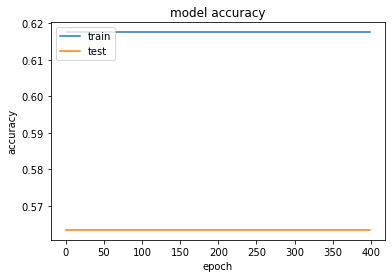

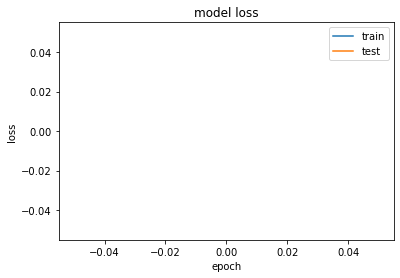

In [49]:
# For accuracy
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# For loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()